# Znak wodny


In [21]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

In [22]:
image = np.array(Image.open('obrazek.jpg'))
hsl_array = np.zeros(image.shape)

random_key = random.randint(1000, 9999)
delta = 1
print(f"Tajny klucz: {random_key}")

Tajny klucz: 3697


### Osadzenie znaku wodnego

In [23]:
def increaseBrightness(image, point, delta):
    image = image.copy()
    rgb_value = image[point[0]][point[1]]
    
    rgb_value = [rgb_value[0] + delta, rgb_value[1] + delta, rgb_value[2] + delta]
    image[point[0]][point[1]] = rgb_value
    return image

def decreaseBrightness(image, point, delta):
    image = image.copy()
    rgb_value = image[point[0]][point[1]]
    
    rgb_value = [rgb_value[0] - delta, rgb_value[1] - delta, rgb_value[2] - delta]
    image[point[0]][point[1]] = rgb_value

    return image

def getBrightnessDiff(image, pointA, pointB):
    rgb_pointA = image[pointA[0]][pointA[1]]
    rgb_pointB = image[pointB[0]][pointB[1]]

    brightnessA = sum(rgb_pointA) / 3
    brightnessB = sum(rgb_pointB) / 3

    return abs(brightnessA - brightnessB)

s_1000: 49953.000000000044
s'_1000: 49579.6666666667


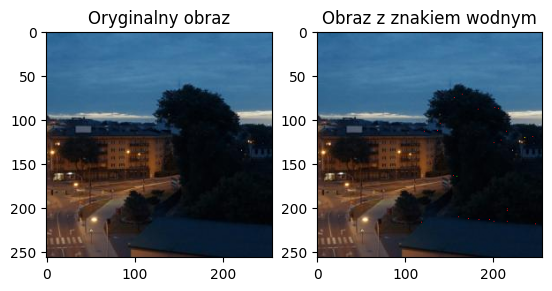

In [24]:
def patchwork(image, key, n):
    s_n = 0
    s_prim_n = 0
    shape = image.shape
    image_copy = image.copy()
    random.seed(key)
    for _ in range(1, n+1):
        point_A = (random.randint(0, shape[0] - 1), random.randint(0, shape[1] - 1))
        point_B = (random.randint(0, shape[0] - 1), random.randint(0, shape[1] - 1))

        s_n += getBrightnessDiff(image, point_A, point_B)

        image_copy = increaseBrightness(image_copy, point_A, delta)
        image_copy = decreaseBrightness(image_copy, point_B, delta)

        s_prim_n += getBrightnessDiff(image_copy, point_A, point_B)

    print(f"s_{n}: {s_n}\ns'_{n}: {s_prim_n}")

    return image_copy

image_with_watermark = patchwork(image, random_key, 1000)
plt.subplot(1, 2, 1)
plt.title("Oryginalny obraz")
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title("Obraz z znakiem wodnym")
plt.imshow(image_with_watermark)

### Detekcja znaku wodnego

In [25]:
def watermarkDetection(image, key, n):
    shape = image.shape
    image_copy = image.copy()
    s_prim_n = 0
    random.seed(key)
    for _ in range(1, n+1):
        point_A = (random.randint(0, shape[0] - 1), random.randint(0, shape[1] - 1))
        point_B = (random.randint(0, shape[0] - 1), random.randint(0, shape[1] - 1))


        image_copy = decreaseBrightness(image_copy, point_A, delta)
        image_copy = increaseBrightness(image_copy, point_B, delta)
        s_prim_n += getBrightnessDiff(image_copy, point_A, point_B)

    print(f"s'_{n}: {s_prim_n}")

watermarkDetection(image_with_watermark, random_key, 1000)

s'_1000: 49953.000000000044
